In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pylab as plt

from pyinverse.phantom import Phantom
from pyinverse.axis import RegularAxis
from pyinverse.grid import RegularGrid, dtft2

In [3]:
p = Phantom()
e = p._ellipses[2]

In [4]:
e

Ellipse(rho=-0.2, a=0.11, b=0.31, x0=0.22, y0=0.0, phi_deg=-18.0)

In [5]:
Nx = Ny = 32
# Nx = Ny = 256
grid = RegularGrid(RegularAxis.linspace(-1, 1, Nx), RegularAxis.linspace(-1, 1, Ny))

In [6]:
A = e.raster(grid)

<IPython.core.display.Javascript object>


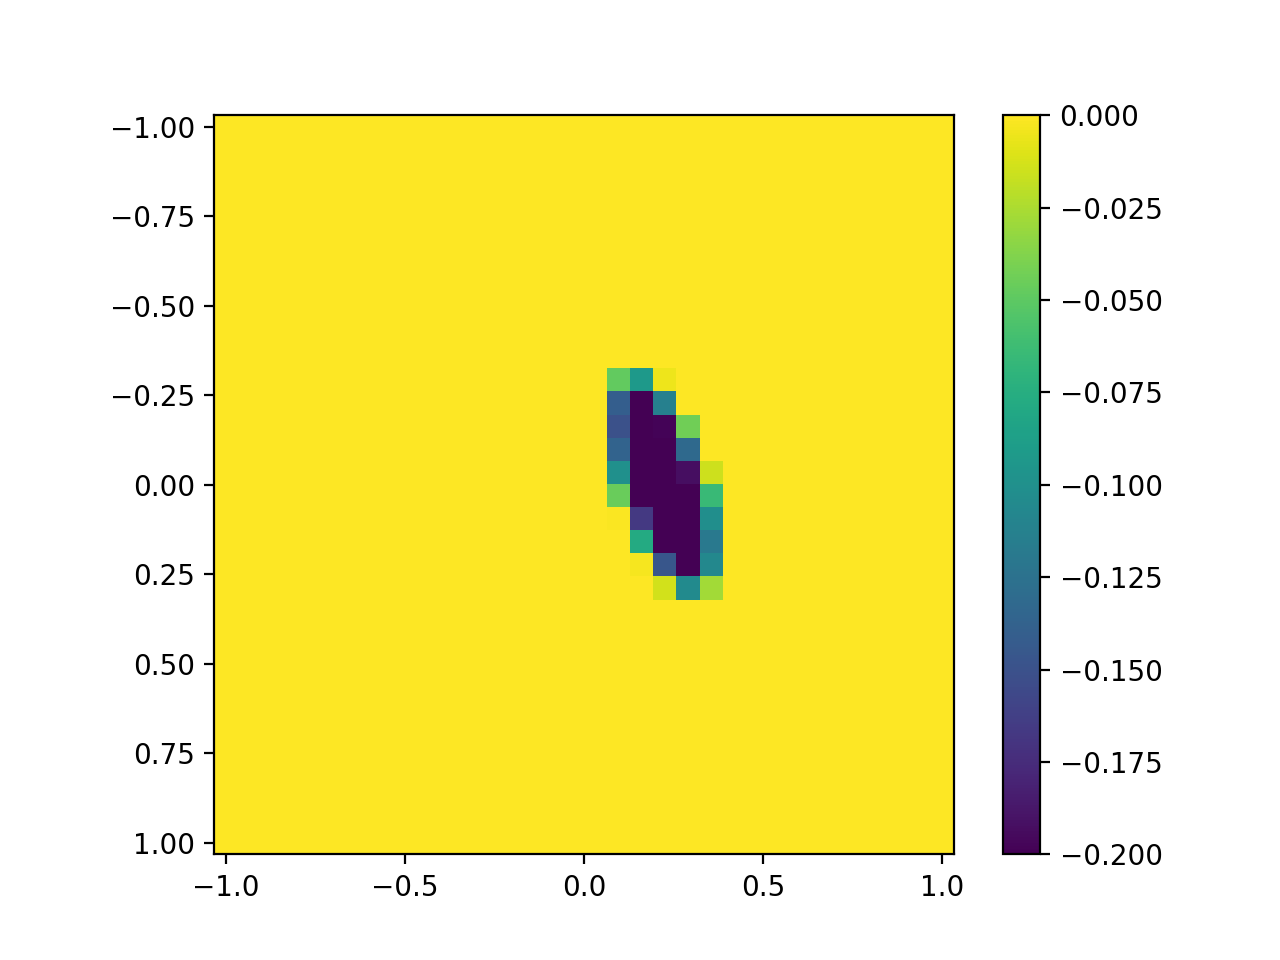

In [7]:
fig, ax = plt.subplots()
im = grid.imshow(ax, A)
fig.colorbar(im);

In [8]:
grid_Omega, A_Omega = grid.spectrum(A)

<IPython.core.display.Javascript object>


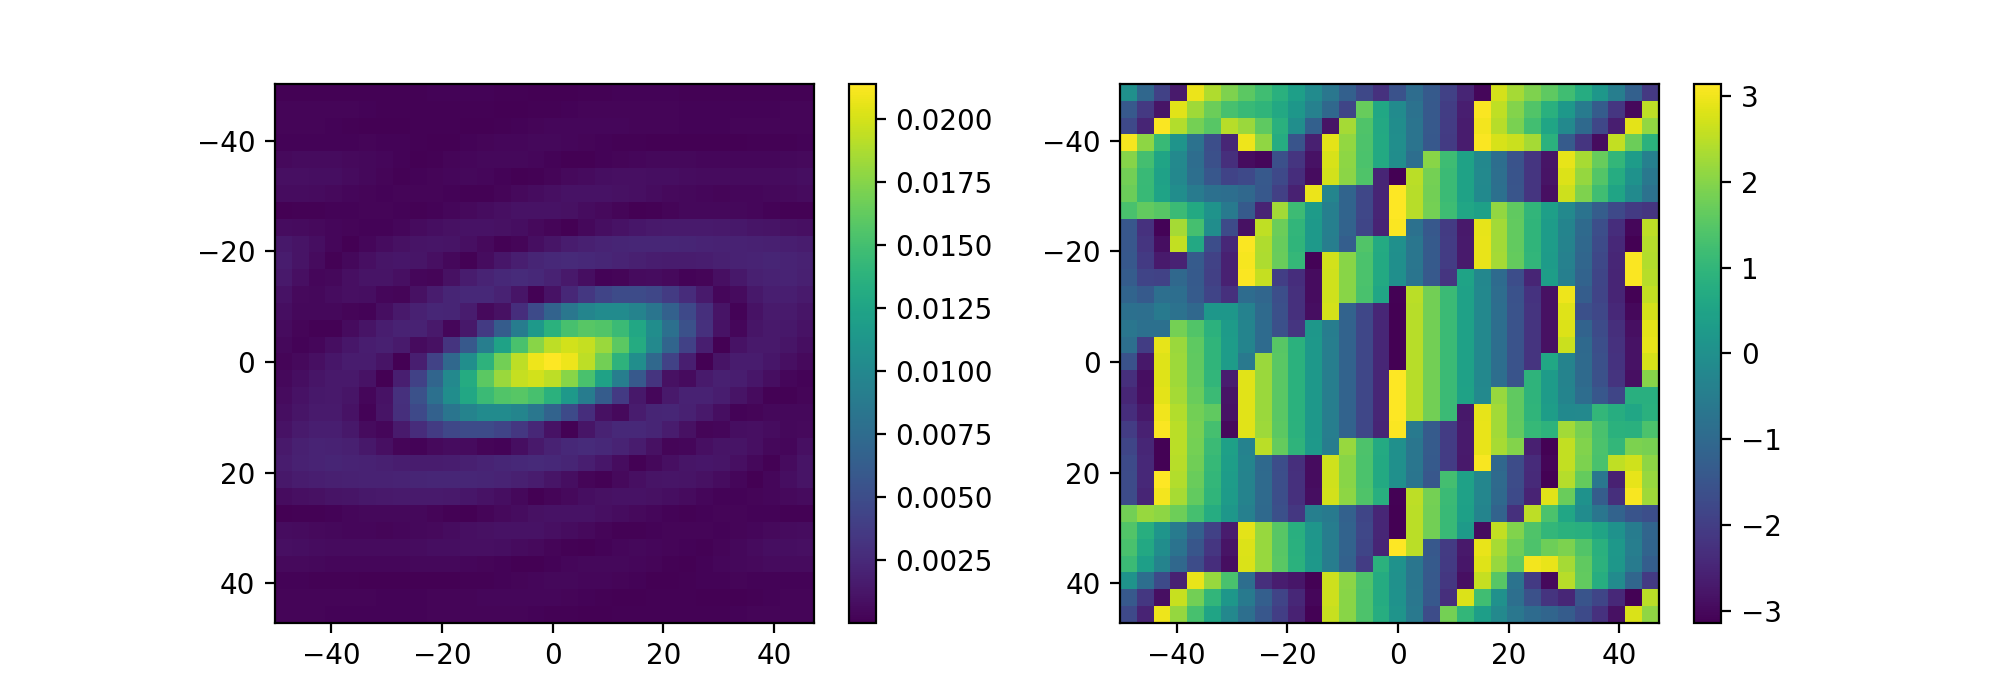

In [9]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 3.5))
im = grid_Omega.imshow(ax[0], np.abs(A_Omega))
fig.colorbar(im, ax=ax[0])
im = grid_Omega.imshow(ax[1], np.angle(A_Omega))
fig.colorbar(im, ax=ax[1]);

In [10]:
E_theory = e.fourier_transform_grid(grid_Omega.Hz())

<IPython.core.display.Javascript object>


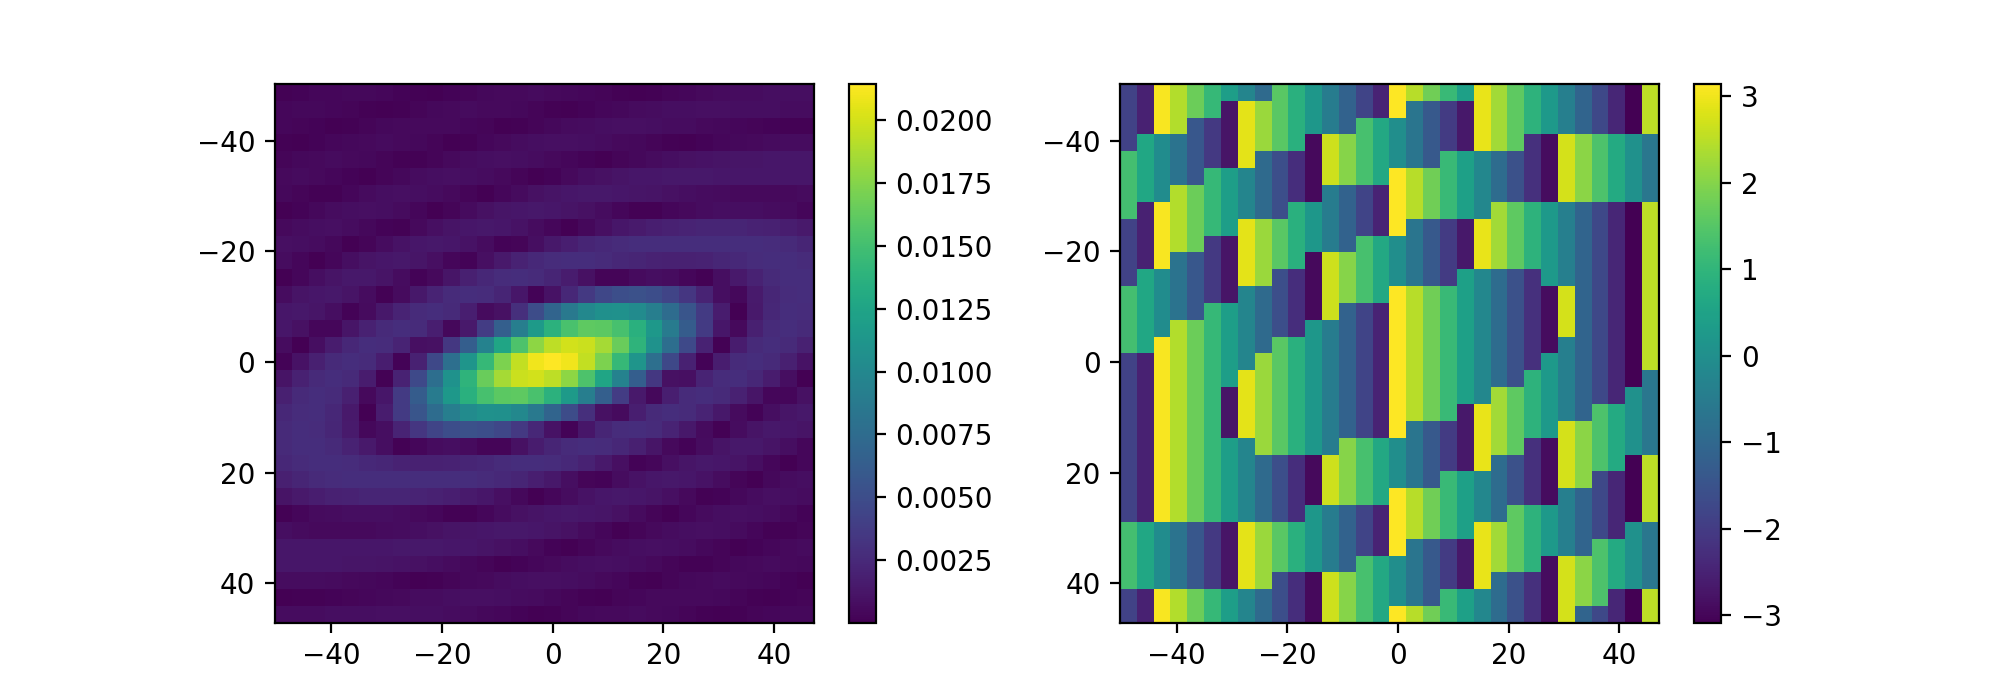

In [11]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 3.5))
im = grid_Omega.imshow(ax[0], np.abs(E_theory))
fig.colorbar(im, ax=ax[0])
im = grid_Omega.imshow(ax[1], np.angle(E_theory))
fig.colorbar(im, ax=ax[1]);

In [12]:
grid_Omega_real, A_Omega_real = grid.spectrum(A, real=True)

In [13]:
grid_Omega

<FreqRegularGrid <axis_x: <FFTRegularAxis x0=-48.6946861306418 T=3.0434178831651124 N=32>> <axis_y: <FFTRegularAxis x0=-48.6946861306418 T=3.0434178831651124 N=32>>>

In [14]:
grid_Omega_real

<RealFreqRegularGrid <axis_x: <RFFTRegularAxis x0=0 T=3.0434178831651124 N=17>> <axis_y: <FFTRegularAxis x0=-48.6946861306418 T=3.0434178831651124 N=32>>>

<IPython.core.display.Javascript object>


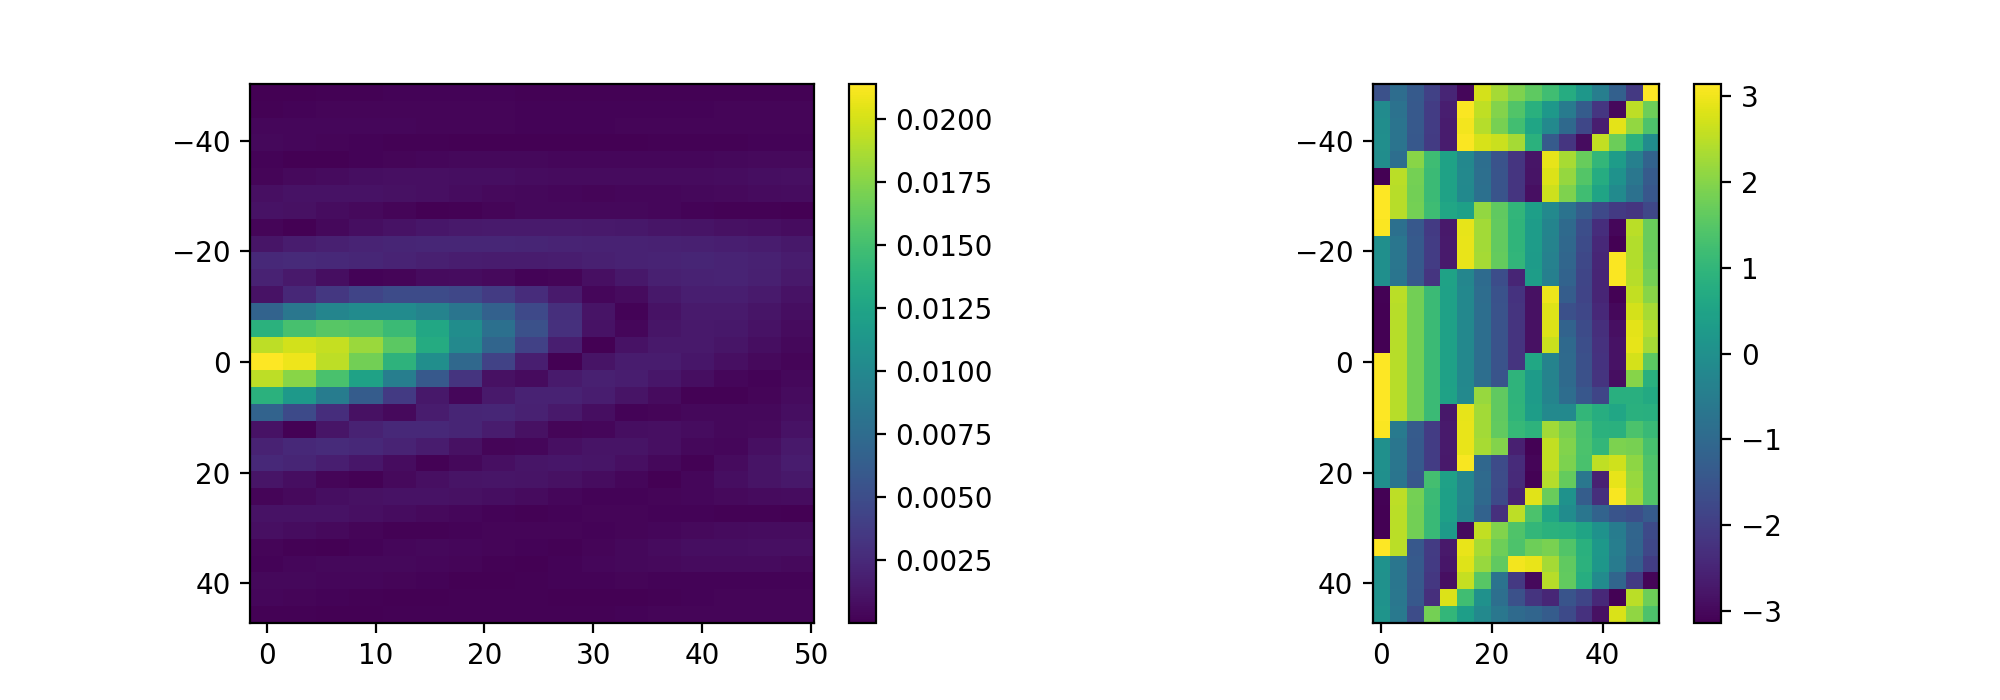

In [15]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 3.5))
im = grid_Omega_real.imshow(ax[0], np.abs(A_Omega_real), aspect='auto')
fig.colorbar(im, ax=ax[0])
im = grid_Omega_real.imshow(ax[1], np.angle(A_Omega_real), )
fig.colorbar(im, ax=ax[1]);

In [16]:
E_theory_real = e.fourier_transform_grid(grid_Omega_real.Hz())

<IPython.core.display.Javascript object>


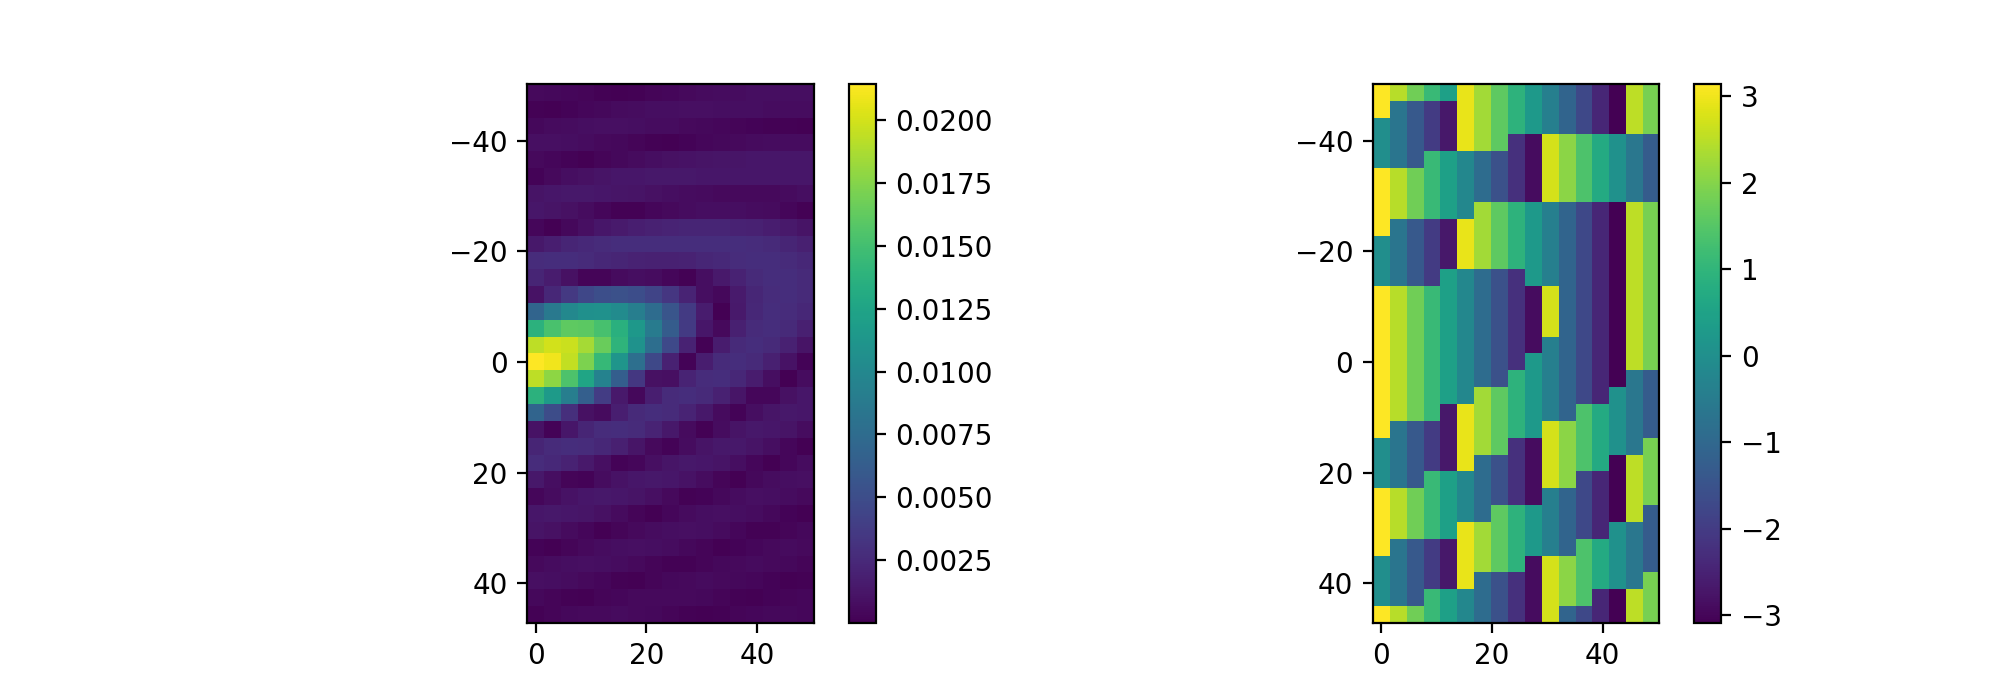

In [17]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 3.5))
im = grid_Omega_real.imshow(ax[0], np.abs(E_theory_real))
fig.colorbar(im, ax=ax[0])
im = grid_Omega_real.imshow(ax[1], np.angle(E_theory_real))
fig.colorbar(im, ax=ax[1]);

<IPython.core.display.Javascript object>


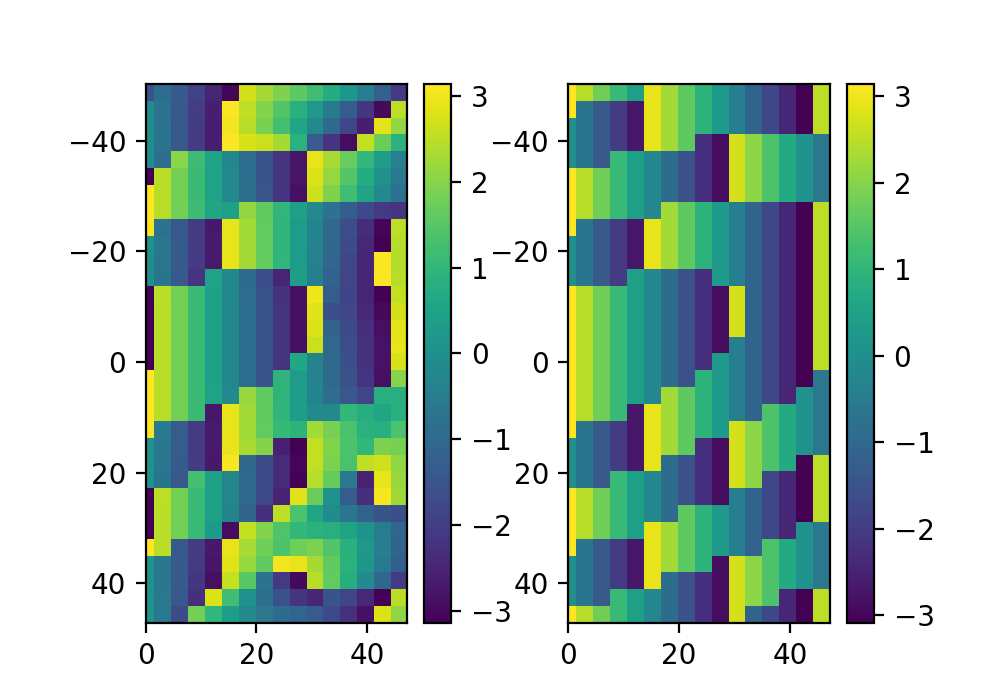

In [18]:
fig, ax = plt.subplots(ncols=2, figsize=(5, 3.5))
im = grid_Omega.imshow(ax[0], np.angle(A_Omega))
fig.colorbar(im, ax=ax[0])
im = grid_Omega.imshow(ax[1], np.angle(E_theory))
fig.colorbar(im, ax=ax[1]);
ax[0].set_xlim(xmin=0)
ax[1].set_xlim(xmin=0);

<IPython.core.display.Javascript object>


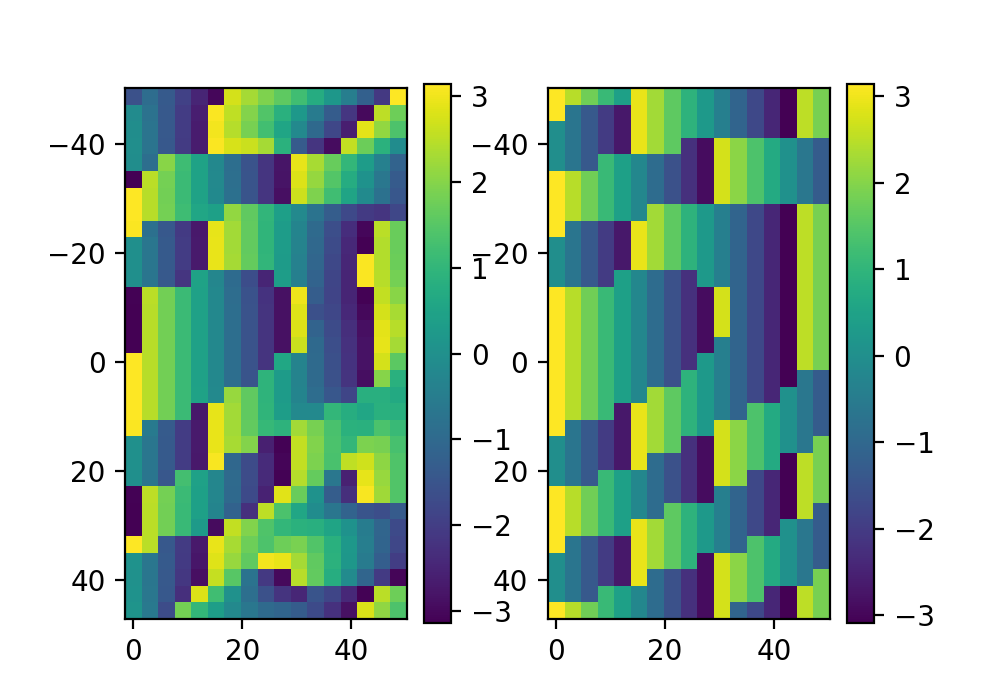

In [19]:
fig, ax = plt.subplots(ncols=2, figsize=(5, 3.5))
im = grid_Omega_real.imshow(ax[0], np.angle(A_Omega_real))
fig.colorbar(im, ax=ax[0])
im = grid_Omega_real.imshow(ax[1], np.angle(E_theory_real))
fig.colorbar(im, ax=ax[1]);

In [20]:
grid_dtft2, A_dtft2 = dtft2(A, n0=(grid.axis_y.x0/grid.axis_y.T, grid.axis_x.x0/grid.axis_x.T))

In [21]:
grid_idtft2, A_idtft2 = grid_dtft2.ispectrum(A_dtft2)

In [22]:
np.max(np.abs(np.imag(A_idtft2)))

1.632846997701179e-17

<IPython.core.display.Javascript object>


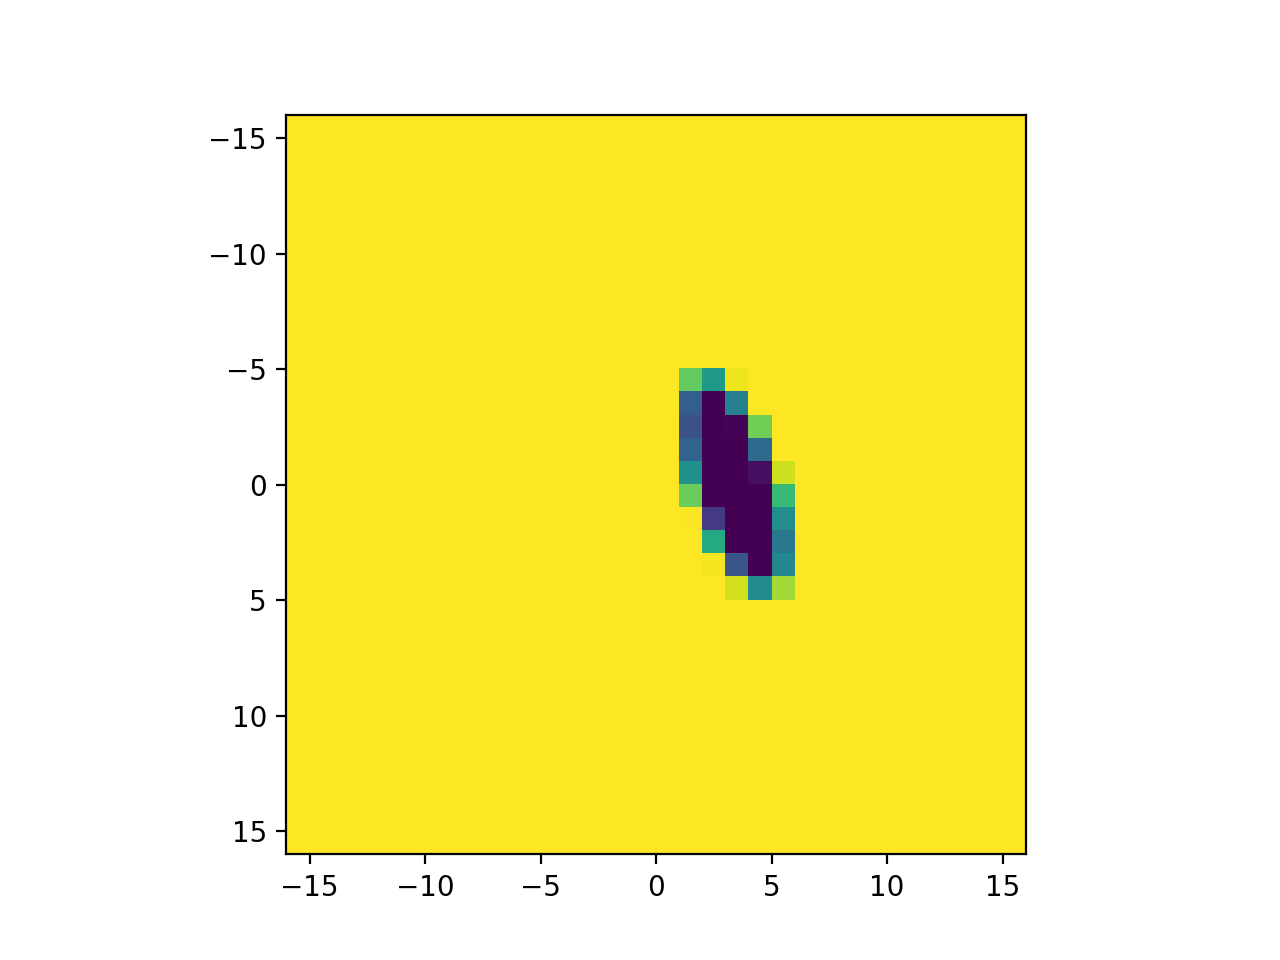

In [23]:
fig, ax = plt.subplots()
grid_idtft2.imshow(ax, np.real(A_idtft2))

In [24]:
grid_ispectrum, A_ispectrum = grid_Omega.ispectrum(A_Omega)

In [25]:
np.max(np.abs(np.imag(A_ispectrum)))

2.115343169601723e-17

In [26]:
A_ispectrum = np.real(A_ispectrum)

<IPython.core.display.Javascript object>


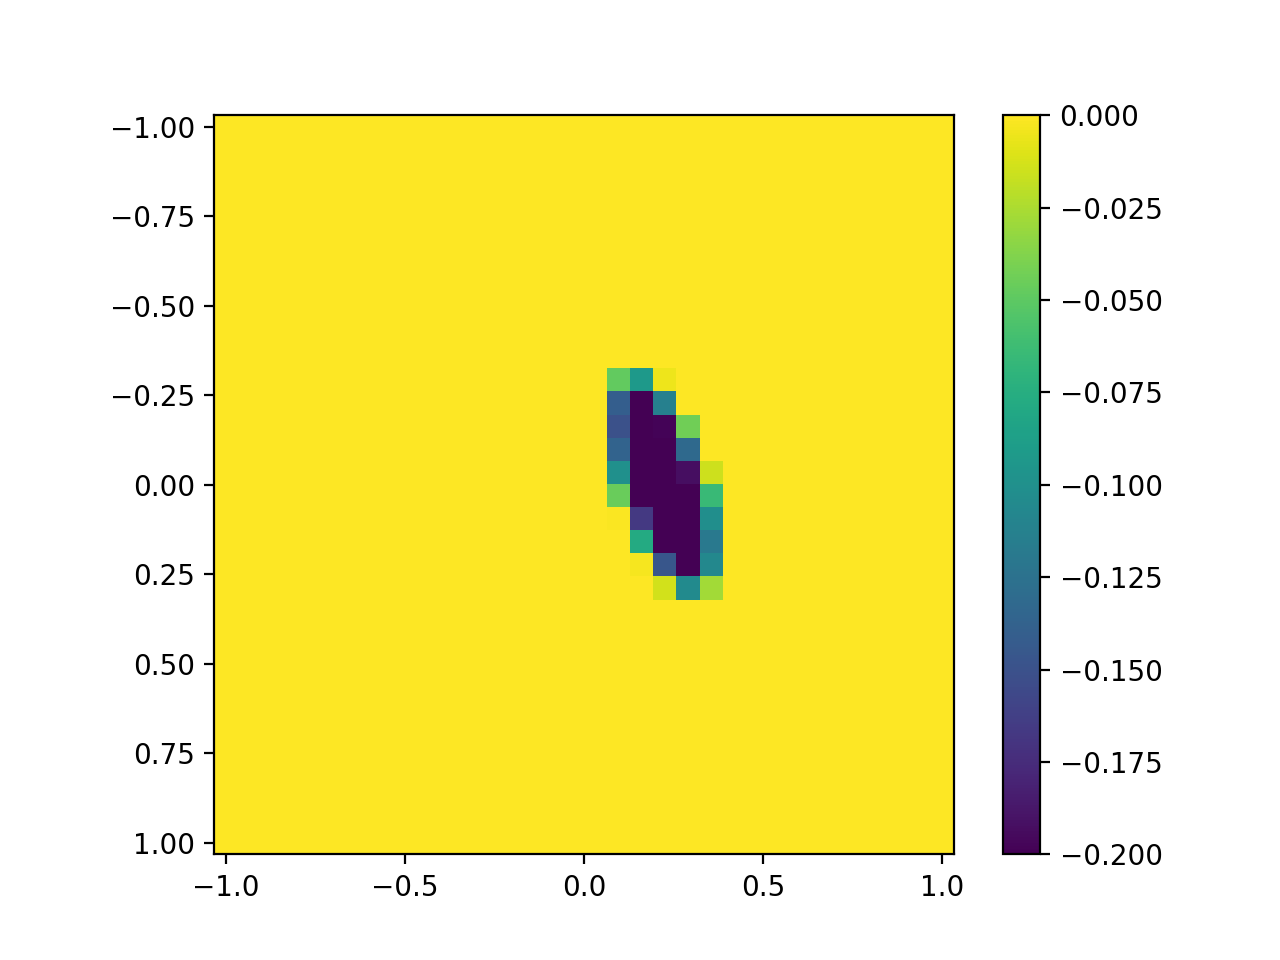

In [27]:
fig, ax = plt.subplots()
im = grid_ispectrum.imshow(ax, A_ispectrum)
fig.colorbar(im);

In [28]:
grid_Omega_real

<RealFreqRegularGrid <axis_x: <RFFTRegularAxis x0=0 T=3.0434178831651124 N=17>> <axis_y: <FFTRegularAxis x0=-48.6946861306418 T=3.0434178831651124 N=32>>>

In [29]:
grid_Omega_real.axis_x._order, grid_Omega_real.axis_y._order

(<Order.INCREASING: 1>, <Order.FFT: 2>)

In [30]:
grid_ispectrum_real, A_ispectrum_real = grid_Omega_real.ispectrum(A_Omega_real)

In [31]:
grid

<RegularGrid <axis_x: <RegularAxis x0=-1 T=0.06451612903225806 N=32>> <axis_y: <RegularAxis x0=-1 T=0.06451612903225806 N=32>>>

In [32]:
grid_ispectrum_real

<RegularGrid <axis_x: <RegularAxis x0=-1 T=0.06451612903225806 N=32>> <axis_y: <RegularAxis x0=-1 T=0.06451612903225806 N=32>>>

In [33]:
A_ispectrum_real.shape

(32, 32)

In [34]:
A_ispectrum_real

array([[ 7.80625564e-18,  7.58151026e-18,  1.07235852e-17, ...,
         6.96701753e-18,  3.09121944e-18,  3.61904479e-18],
       [ 1.36609474e-17,  1.39555495e-17,  1.23975076e-17, ...,
         7.89265655e-19,  4.03697284e-18,  8.55489825e-18],
       [-1.15196481e-18,  3.49191462e-18,  4.48658239e-18, ...,
         7.45686398e-21, -3.00581381e-18, -5.32923396e-18],
       ...,
       [ 8.95822045e-18,  1.28418249e-17,  1.24972091e-17, ...,
         1.54929606e-17,  2.04008517e-17,  1.87759669e-17],
       [ 2.87313576e-18,  4.39773595e-18,  8.42671467e-18, ...,
         3.45702567e-18,  9.35247052e-18,  1.08819691e-17],
       [-5.42101086e-19, -1.94655830e-18,  2.63988375e-18, ...,
        -1.08239931e-18,  2.97552934e-19,  4.69479606e-18]])

<IPython.core.display.Javascript object>


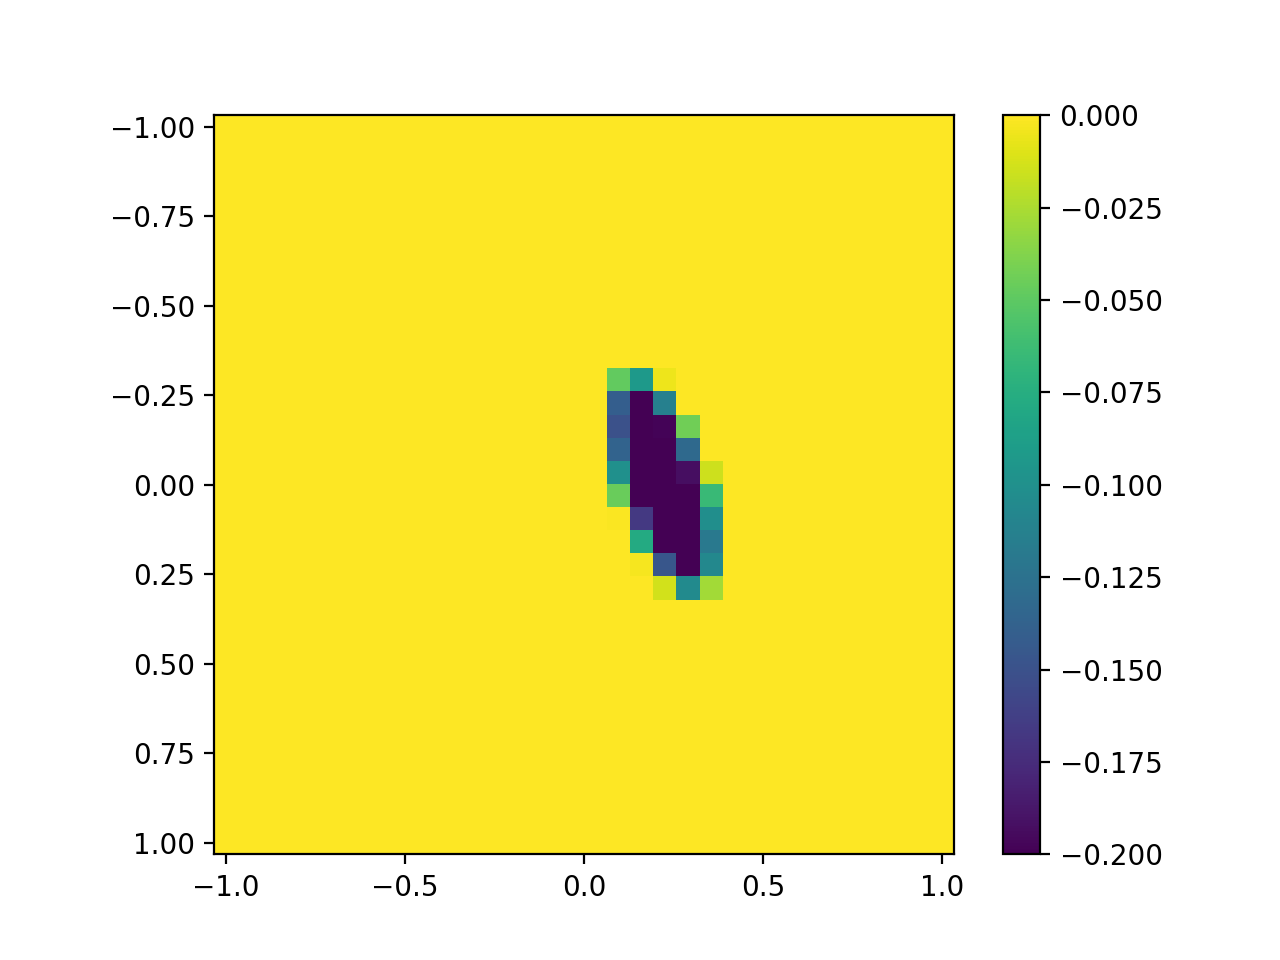

In [35]:
fig, ax = plt.subplots()
im = grid_ispectrum_real.imshow(ax, A_ispectrum_real)
fig.colorbar(im);